# Optimización de funciones escalares diferenciables con `SymPy`

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/thumb/b/b6/Extrema_example_es.svg/1200px-Extrema_example_es.svg.png" width="300px" height="100px" />

> - Mediante optimización se obtienen soluciones elegantes tanto en teoría como en ciertas aplicaciones. 
> - La teoría de optimización usa elementos comenzando con cálculo elemental y álgebra lineal básica, y luego se extiende con análisis funcional y convexo.
> - Las aplicaciones en optimización involucran ciencia, ingeniería, economía, finanzas e industria.
> - El amplio y creciente uso de la optimización lo hace escencial para estudiantes y profesionales de cualquier rama de la ciencia y la tecnología.

**Referencia:**
- http://www.math.uwaterloo.ca/~hwolkowi//henry/reports/talks.d/t06talks.d/06msribirs.d/optimportance.shtml

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/e7/OpenStreetMap_routing_service.png/300px-OpenStreetMap_routing_service.png" width="300px" height="100px" />

Algunas aplicaciones son:

1. Ingeniería
 - Encontrar la composición de equilibrio de una mezcla de diferentes átomos.
 - Planeación de ruta para un robot (o vehículo aéreo no tripulado).
 - Planeación de la mano de obra óptima en una construcción o planta de producción.
2. Distribución óptima de recursos.
 - Distribución de rutas de vuelo.
 - Encontrar una dieta óptima.
 - Planeación de ruta óptima.
3. Optimización financiera
 - Administración de riesgos.
 - Portafolios de inversión.

En esta clase veremos aspectos básicos de optimización. En específico, veremos cómo obtener máximos y mínimos de una función escalar de una variable (como en cálculo diferencial).

___
## 0. Librerías que usaremos

Como ya dijimos en la primer clase `python` es el lenguaje de programación (el cual es de alto nivel). Sin embargo, `python` solo tiene unos pocos comandos primitivos y para hacer más fácil su uso en nuestras actividades de simulación en ingeniería, otras personas ya han escrito ciertas librerías por nosotros.

### 0.1 `NumPy`

<img style="float: right; margin: 0px 0px 15px 15px;" src="http://www.numpy.org/_static/numpy_logo.png" width="300px" height="100px" />

`NumPy` (Numerical Python) es la librería fundamental para computación científica (numérica) con `Python`. Contiene, entre otras cosas:
- un objeto tipo arreglo N-dimensional muy poderoso
- funciones sofisticadas
- funciones de álgebra lineal, transformada de Fourier y números aleatorios.

Por lo anterior, `NumPy` es de amplio uso entre la comunidad científica e ingenieril (por su manejo de cantidades vectoriales). De la misma manera, se usa para guardar datos. Para nuestros propósitos, se puede usar libremente.

**Referencia:**
- http://www.numpy.org/

`NumPy` ya viene incluido en la instalación estándar de Anaconda por defecto. Para comenzar a usarlo, solo debemos de importarlo:

In [5]:
# importar la librería numpy
import numpy as np

### 0.2 `SymPy`

<img style="float: right; margin: 0px 0px 15px 15px;" src="http://www.sympy.org/static/images/logo.png" width="300px" height="100px" />

`SymPy` (Symbolic Python) es una librería de `Python` para matemáticas simbólicas. Su objetivo es convertirse en un sistema de álgebra computacional con las mejores características, manteniendo el código lo más simple posible para que sea comprensible.

**Referencia:**
- http://www.sympy.org/en/index.html

`SymPy` ya viene incluido en la instalación estándar de Anaconda por defecto. Para comenzar a usarlo, solo debemos de importarlo:

In [6]:
# importar la librería sympy
import sympy as sym
# imprimir en formato latex
sym.init_printing(use_latex='mathjax')

La funcionalidad de imprimir en formato LaTex que nos da `SymPy` mediante el proyecto `mathjax` hace de `SymPy` una herramienta muy atractiva...

Notar que en `SymPy` y en `NumPy` existen funciones con el mismo nombre, pero reciben tipos de datos diferentes...

Explicar el uso de la sintaxis `from numpy import *` y sus peligros (no recomendable).

In [7]:
# diferencias de funciones de sympy y numpy
sym.var('x')
sym.sin(x)*np.sin(3)

0.141120008059867⋅sin(x)

In [8]:
# importar con * y ver que pasa
# from numpy import *
# from sympy import *
# No recomendado

### 0.3 `PyPlot` de `matplotlib`

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://matplotlib.org/_static/logo2.svg" width="300px" height="100px" />

El módulo `PyPlot` de la librería `matplotlib` contiene funciones que nos permite generar una gran cantidad de gráficas rápidamente. Las funciones de este módulo están escritas con el mismo nombre que las funciones para graficar en `Matlab`.

**Referencia:**
- https://matplotlib.org/api/pyplot_summary.html

In [9]:
# importar matplotlib.pyplot
import matplotlib.pyplot as plt
# comando para que las gráficas salgan en la misma ventana
%matplotlib inline

Ya que revisamos todas las librerías que usaremos, empecemos con la clase como tal...

___
Basamos todos los resultados en los siguientes teoremas:

## 1. Teorema de Fermat (análisis)

Si una función $f(x)$ alcanza un máximo o mínimo local en $x=c$, y si la derivada $f'(c)$ existe en el punto $c$, entonces $f'(c) = 0$.

### Ejemplo

Sabemos que la función $f(x)=x^2$ tiene un mínimo global en $x=0$, pues

$$f(x)=x^2\geq0,\qquad\text{y}\qquad f(x)=x^2=0 \qquad\text{si y solo si}\qquad x=0.$$

In [10]:
# declarar la variable real x
#t = sym.Symbol('x')
#t
sym.var('x', real = True)

x

In [11]:
# declarar ahora f=x^2 y mostrar
f = x**2 + sym.sin(7*x)
f

 2           
x  + sin(7⋅x)

In [8]:
# derivar f respecto a x y mostrar
df = sym.diff(f, x)
df

2⋅x

In [9]:
# resolver f'(x)=0 y mostrar soluciones
xc = sym.solve(df, x)
xc

[0]

Veamos la gráfica...

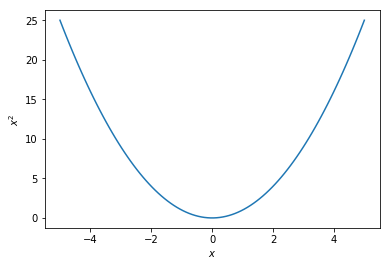

In [10]:
# convertir f e una función que se pueda evaluar numéricamente (función lambdify de la librería sympy)
f_num = sym.lambdify([x], f, 'numpy')
x_vec = np.linspace(-5, 5, 100)

# graficar
plt.plot(x_vec, f_num(x_vec))
plt.xlabel('$x$')
plt.ylabel('$x^2$')
plt.show()

Ver diferencias entre f y f_num

In [11]:
# intentar evaluar f y f_num


**Otra manera de hacer lo anterior**

Concepto de función...

In [12]:
def f(x):
    return x**2

In [13]:
f(x)

 2
x 

In [14]:
f(np.array([5.124, 2.5436]))

array([26.255376  ,  6.46990096])

In [15]:
df = sym.diff(f(x), x)
df

2⋅x

In [16]:
x_c = sym.solve(df, x)
x_c[0]

0

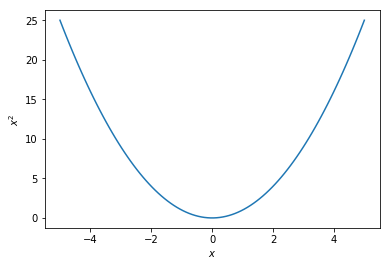

In [17]:
# graficar
plt.plot(x_vec, f(x_vec))
plt.xlabel('$x$')
plt.ylabel('$x^2$')
plt.show()

El converso del teorema anterior no es cierto.

### Actividad
Considere $g(x)=x^3$. 
- Usando `sympy`, muestre que $g'(0)=0$.
- Sin embargo, descartar que $x=0$ es un extremo de $g(x)$ viendo su **gráfica**.

In [18]:
def g(x):
    return x**3

In [19]:
dg = sym.diff(g(x), x)
dg

   2
3⋅x 

In [20]:
puntos_criticos = sym.solve(dg, x)
puntos_criticos

[0]

In [21]:
dg_eval0 = dg.subs(x, puntos_criticos[0])
dg_eval0

0

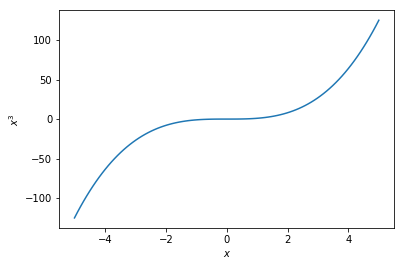

In [22]:
# graficar
plt.plot(x_vec, g(x_vec))
plt.xlabel('$x$')
plt.ylabel('$x^3$')
plt.show()

## 2. Criterio de la segunda derivada

Sea $f(x)$ una función tal que $f’(c)=0$ y cuya segunda derivada existe en un intervalo abierto que contiene a $c$.
- Si $f’’(c)>0$, entonces $f(c)$ es un mínimo relativo.
- Si $f’’(c)<0$, entonces $f(c)$ es un máximo relativo.
- Si $f’’(c)=0$, entonces el criterio no decide. 

### Ejemplo

Mostrar, usando `sympy`, que la función $f(x)=x^2$ tiene un mínimo relativo en $x=0$.

Ya vimos que $f'(0)=0$. Notemos que:

In [23]:
f = x**2
#d2f = sym.diff(f, x, x)
d2f = sym.diff(f, x, 2)
d2f

2

In [24]:
d2f>0

True

Por tanto, por el criterio de la segunda derivada, $f(0)=0$ es un mínimo relativo (en efecto, el mínimo global).

### Ejemplo
¿Qué pasa con $g(x)=x^3$ al intentar utilizar el criterio de la segunda derivada? (usar `sympy`).

In [25]:
g(x)

 3
x 

In [26]:
d2g = sym.diff(g(x), x, x)
d2g

6⋅x

In [27]:
d2g.subs(x, 0)

0

### Actividad

¿Qué pasa con $h(x)=x^4$ al intentar utilizar el criterio de la segunda derivada?.

In [28]:
def h(x):
    return x**4

In [29]:
dh = sym.diff(h(x), x, 1)
dh

   3
4⋅x 

In [30]:
p_c_h = sym.solve(dh, x)
p_c_h

[0]

In [31]:
d2h = sym.diff(h(x), x, 2)
d2h

    2
12⋅x 

In [32]:
d2h.subs(x, p_c_h[0])

0

Como la segunda derivada en el punto crítico es cero, el criterio de la segunda derivada no decide.

## 3. Método para determinar extremos absolutos de una función continua y=f(x) en [a,b] 

- Determinar todos los valores críticos $c_1, c_2, c_3, \dots, c_n$ en $(a,b)$.
- Evaluar $f$ en todos los valores críticos y en los extremos $x=a$ y $x=b$.
- El más grande y el más pequeño de los valores de la lista $f(a), f(b), f(c_1), f(c_2), \dots, f(c_n)$ son el máximo absoluto y el mínimo absoluto, respectivamente, de f en el intervalo [a,b].

### Ejemplo

Determinar los extremos absolutos de $f(x)=x^2-6x$ en $\left[0,5\right]$.

Obtenemos los puntos críticos de $f$ en $\left[0,5\right]$:

In [33]:
f = x**2-6*x
f

 2      
x  - 6⋅x

In [34]:
df = sym.diff(f, x)
df

2⋅x - 6

In [35]:
x_c = sym.solve(df, x)
x_c

[3]

Evaluamos $f$ en los extremos y en los puntos críticos:

In [36]:
f.subs(x, 0), f.subs(x, 5), f.subs(x, x_c[0])

(0, -5, -9)

Concluimos que el máximo absoluto de $f$ en $\left[0,5\right]$ es $0$ y se alcanza en $x=0$, y que el mínimo absoluto es $-9$ y se alcanza en $x=3$.

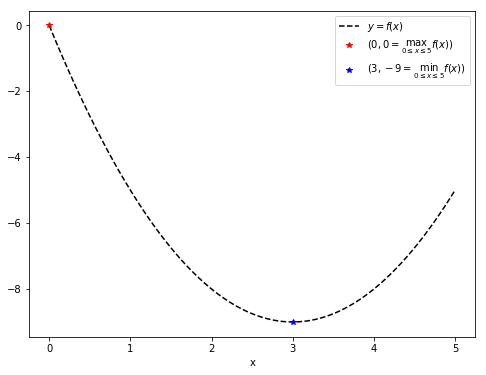

In [37]:
f_num = sym.lambdify([x], f, 'numpy')
x_vec = np.linspace(0, 5, 100)

plt.figure(figsize=(8,6))
plt.plot(x_vec, f_num(x_vec), 'k--', label = '$y=f(x)$')
plt.plot([0], [0], '*r', label = '$(0,0=\max_{0\leq x\leq 5} f(x))$')
plt.plot([3], [-9], '*b', label = '$(3,-9=\min_{0\leq x\leq 5} f(x))$')
plt.legend(loc='best')
plt.xlabel('x')
plt.show()

### Actividad
Determinar los valores extremos absolutos de $h(x)=x^3-3x$ en $\left[-2.2,1.8\right]$, usando `sympy`. Mostrar en una gráfica.

In [38]:
sym.var('x', real = True)

x

In [39]:
def h(x):
    return x**3-3*x

In [40]:
dh = sym.diff(h(x), x)
dh

   2    
3⋅x  - 3

In [41]:
p_c = sym.solve(dh, x)
p_c

[-1, 1]

In [42]:
h(-1), h(1), h(-2.2), h(1.8)

(2, -2, -4.048000000000003, 0.4320000000000004)

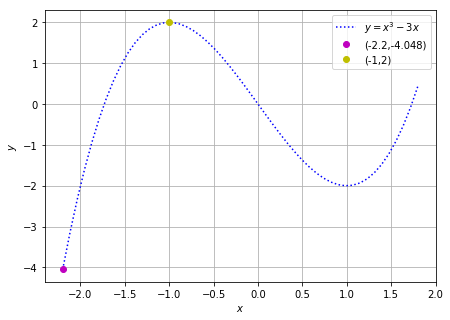

In [43]:
x_vec = np.linspace(-2.2, 1.8, 50)

plt.figure(figsize=(7,5))
plt.plot(x_vec, h(x_vec), 'b:', label = '$y=x^3-3x$')
plt.plot([-2.2], [h(-2.2)], 'mo', label = '(-2.2,-4.048)')
plt.plot([-1], [h(-1)], 'yo', label = '(-1,2)')
plt.legend(loc='best')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.grid()
plt.show()

### En varias variables...

El procedimiento es análogo. 

Si una función $f:\mathbb{R}^n\to\mathbb{R}$ alcanza un máximo o mínimo local en $\boldsymbol{x}=\boldsymbol{c}\in\mathbb{R}^n$, y $f$ es diferenciable en el punto $\boldsymbol{x}=\boldsymbol{c}$, entonces $\left.\frac{\partial f}{\partial \boldsymbol{x}}\right|_{\boldsymbol{x}=\boldsymbol{c}}=\boldsymbol{0}$ (todas las derivadas parciales en el punto $\boldsymbol{x}=\boldsymbol{c}$ son cero).

**Criterio de la segunda derivada:** para ver si es máximo o mínimo, se toma la segunda derivada (matriz jacobiana) y se verifica definición negativa o positiva, respectivamente.

<br />
<b>Teorema</b> Sea $f$ un campo escalar con segundas derivadas continuas $D_{ij}$ en una bola $B(a,\varepsilon)$ entonces:<br />
<br />
a) Si todos los valores propios de $H(a)$ son positivos, $f$ tiene un mínimo relativo en $a$.
<br />
b) Si todos los valores propios de $H(a)$ son negativos, $f$ tiene un máximo relativo en $a$.
<br />
c) Si $H(a)$ tiene valores propios positivos y negativos, $f$ tiene un punto de ensilladura en $a$.
<br />

<br />
La demostración la pueden encontrar en (CALCULUS volumen 2. Tom M.Apostol, pág. 311)
<br />

Si se restringe a cierta región, hay ciertas técnicas. La más general, pero también la más compleja es la de **multiplicadores de Lagrange**.

In [44]:
sym.var('x y')
x, y

(x, y)

In [45]:
def f(x, y):
    return x**2 + y**2

In [46]:
dfx = sym.diff(f(x,y), x)
dfy = sym.diff(f(x,y), y)
dfx, dfy

(2⋅x, 2⋅y)

In [47]:
xy_c = sym.solve([dfx, dfy], [x, y])
xy_c

{x: 0, y: 0}

In [48]:
x_c, y_c = xy_c[x], xy_c[y]
x_c, y_c

(0, 0)

In [49]:
d2fx = sym.diff(f(x,y), x, 2)
d2fy = sym.diff(f(x,y), y, 2)
dfxy = sym.diff(f(x,y), x, y)

Jf = sym.Matrix([[d2fx, dfxy], [dfxy, d2fy]])
Jf.eigenvals()

{2: 2}

In [50]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

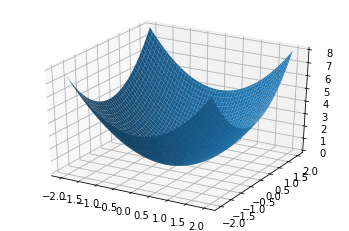

In [51]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = np.linspace(-2, 2, 100)
y = x
X, Y = np.meshgrid(x, y)

ax.plot_surface(X, Y, f(X, Y))
ax.plot([x_c], [y_c], [f(x_c,y_c)], '*r')

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Xiuhcoatl.
</footer>